In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing  import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [54]:
df=pd.read_csv(r'C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\data_set\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [55]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [64]:
#chcking the data type and no of col
print(f"chcking the data type : {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

FRom the above describe method we can see that there are many column with attribute >5
As for that reson we will use onehot encodeing or get_dummies to convert the data into numerical.

In [65]:
#Checking for Null values  
df.isnull().sum()    # looks like there are no null values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [56]:
df['class'].unique()  # checking the unique attribute in the class column

array(['p', 'e'], dtype=object)

In [57]:
X=df.drop(["class"],axis=1) # dropping the class so we can encode the feature 
#y=df['class']

In [58]:
features=X.columns

In [ ]:
#Writing the below to code to use get_dummies to convert alphabet to number
# for performing encoding to all the features.
#Get_dummies is better choice than label encoding , as label encoding is good for attribute <5

In [8]:
df_dummies=pd.get_dummies(df[features],drop_first=True)
df_dummies

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,1,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [9]:
df=df.join(df_dummies)   #joining the dummies variable with the data frame
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,x,s,n,t,p,f,c,n,k,...,0,1,0,0,0,0,0,0,1,0
1,e,x,s,y,t,a,f,c,b,k,...,1,0,0,0,1,0,0,0,0,0
2,e,b,s,w,t,l,f,c,b,n,...,1,0,0,0,0,0,1,0,0,0
3,p,x,y,w,t,p,f,c,n,n,...,0,1,0,0,0,0,0,0,1,0
4,e,x,s,g,f,n,f,w,b,k,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,0,0,0,0,0,1,0,0,0,0
8120,e,x,s,n,f,n,a,c,b,y,...,0,0,1,0,0,1,0,0,0,0
8121,e,f,s,n,f,n,a,c,b,n,...,0,0,0,0,0,1,0,0,0,0
8122,p,k,y,n,f,y,f,c,n,b,...,0,0,1,0,0,1,0,0,0,0


In [10]:
#dropping the feature as we have encoded those feature
df.drop(columns=features,axis=1,inplace=True)

In [12]:
print(df.shape)
df

(8124, 96)


,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,p,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,e,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,e,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,p,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,e,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,e,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,e,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,p,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [13]:
# replace the label alphabet with 0 and 1
df['class']=df['class'].replace({'p':0,'e':1})

In [22]:
# data is balanced 
df['class'].value_counts()

1    4208
0    3916
Name: class, dtype: int64

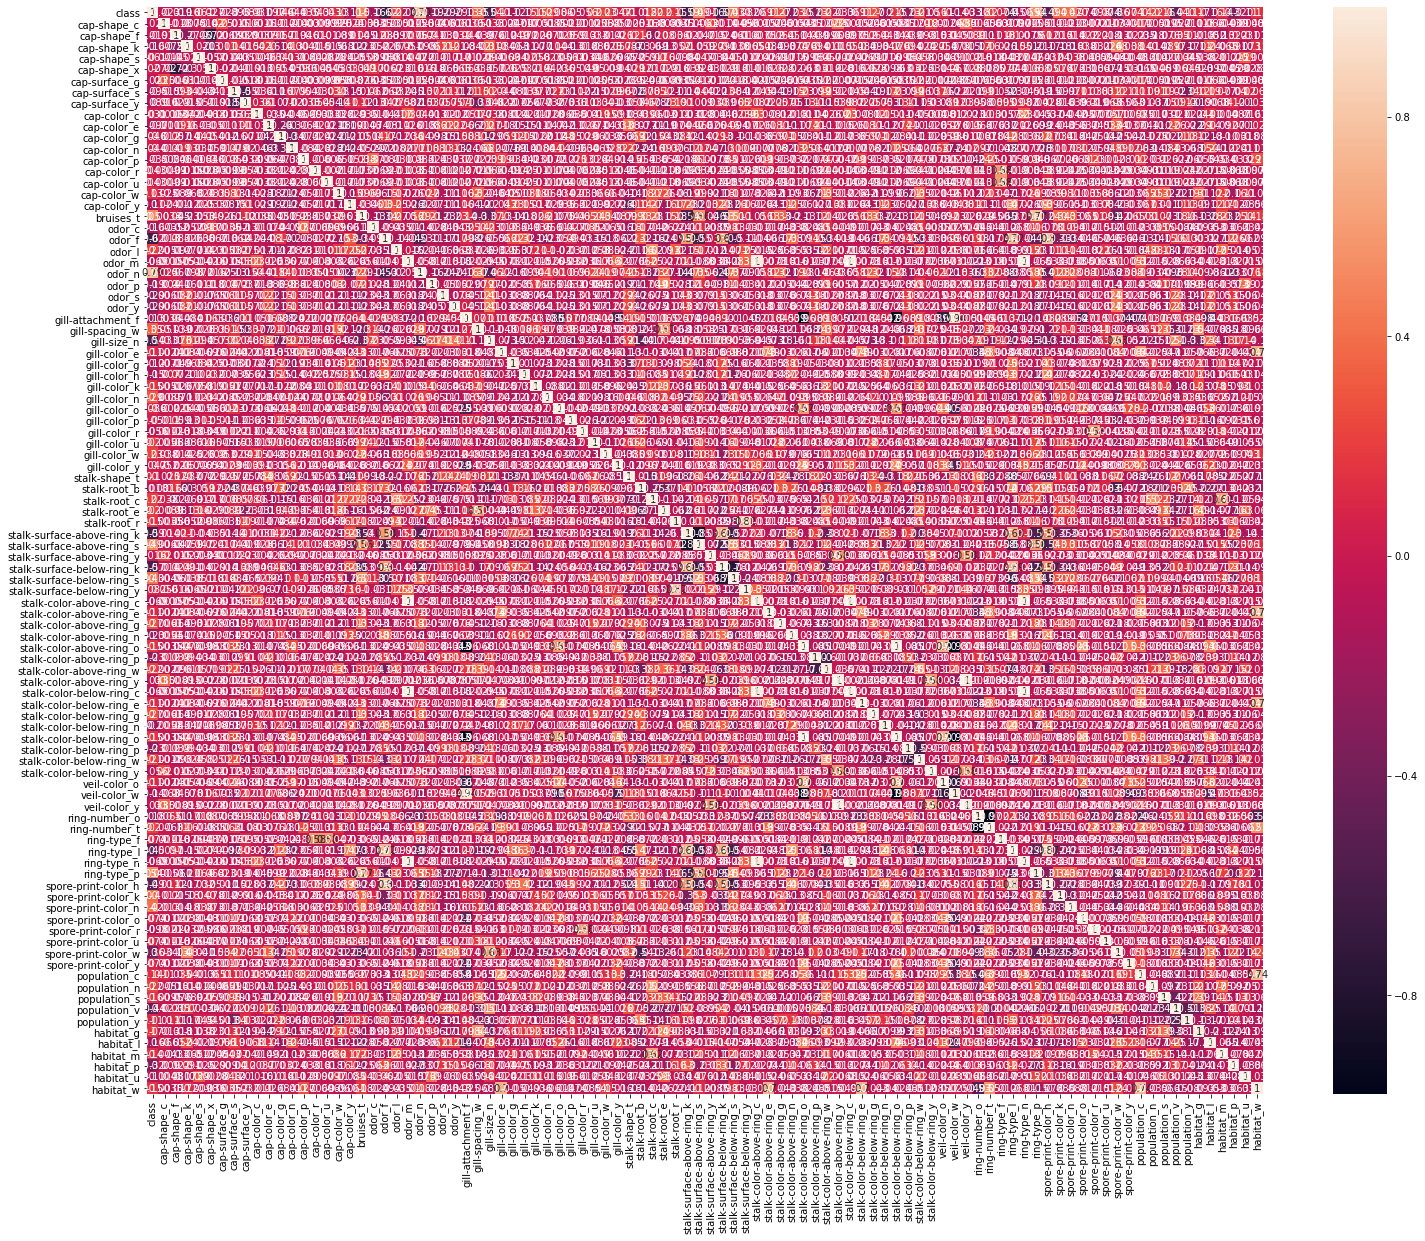

In [51]:
#Ploting the heat map
data=df.corr()
plt.figure(figsize=(25,20))
ax=sns.heatmap(data,annot=True,linecolor='white')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [24]:
X=df.drop(['class'],axis=1)
y=df['class']

In [25]:
#Spliting the dataset in train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


In [26]:
#fitting the logistis model
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)

C:\Users\GD077686\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
y_pred=log_reg.predict(X_test)

In [33]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

1.0

In [34]:
confusion_matrix(y_test,y_pred)

array([[ 991,    0],
       [   0, 1040]], dtype=int64)

In [36]:
print('classfication report-------------\n',classification_report(y_test,y_pred))

classfication report-------------
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [39]:
#Let's run the SVc model
from sklearn.svm import SVC

In [41]:
svm_model=SVC(C=1.0, kernel='rbf')
svm_model.fit(X_train,y_train)

C:\Users\GD077686\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [49]:
print(f"Support Vector : {svm_model.score(X_test,y_test)}")

Support Vector : 0.9960610536681438


In [66]:
from sklearn.model_selection import GridSearchCV,cross_val_score


# doing the Hyperparameter tuning


In [74]:
param_grid={'penalty' : [ 'l1', 'l2'],'C' : [0.001,0.1,0.009,0.01]} 

In [75]:
grid_search=GridSearchCV(log_reg,param_grid=param_grid,scoring='recall')


In [79]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.1, 0.009, 0.01],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [80]:
grid_search.best_params_   #dispalying the best paramater

{'C': 0.1, 'penalty': 'l1'}

In [82]:
clf=LogisticRegression(C= 0.1, penalty ='l1')

In [83]:
clf.fit(X_train,y_train)  #Training the model

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_pred=clf.predict(X_test)
print(f" accuracy : {accuracy_score(y_test,y_pred)}")
print(f"classification report : \n{classification_report(y_test,y_pred)}")

 accuracy : 0.9985228951255539
classification report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       991
           1       1.00      1.00      1.00      1040

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [ ]:
#After doing the hypermater tuning , we can say that model is not overfitting 